Graph 2: prey type and weight per year
Total number of nodes:  32
Total number of edges:  70


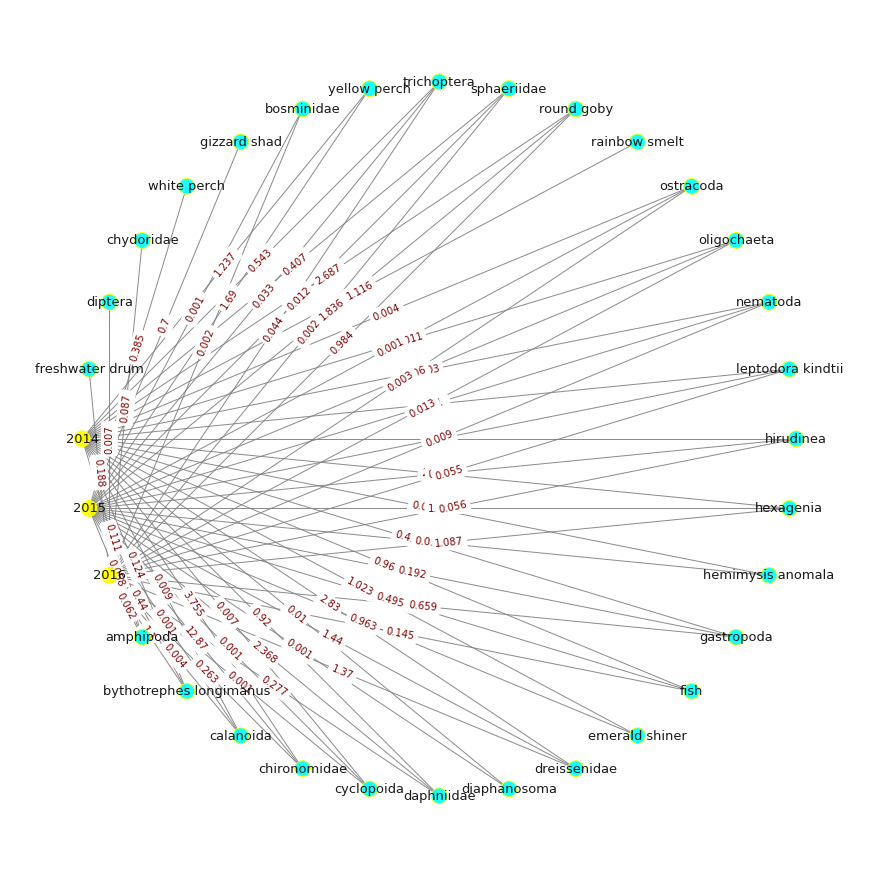

In [56]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Graph2.csv")
df1 = df
print("Graph 2: prey type and weight per year")


G2 = nx.Graph()

G2.add_nodes_from(df1['year'])
G2.add_nodes_from(df1['prey'])

#edge_list = df.loc[0::346, 'prey_weight_g']

# Here the changes begin:


# Construct the edge_list and add it to graph with weights:
edge_list = df1[['year','prey','prey_weight_g']] #changed syntax
edge_list2 = list(edge_list.itertuples(index=False))

G2.add_weighted_edges_from(edge_list2)

print("Total number of nodes: ", int(G2.number_of_nodes()))
print("Total number of edges: ", int(G2.number_of_edges()))


# Create dictionary of edge labels: 

edge_labels_key = df1[['year','prey']].itertuples(index=False)
edge_labels_dict = dict(zip(edge_labels_key, df1['prey_weight_g'].round(decimals = 4)))

# Style and show graph: 
pos = nx.shell_layout(G2,scale=1)

# Make graph styling 
plt.figure(3,figsize=(12,12))

color_map = ['yellow' if node == 2014 or node == 2015 or node == 2016 else 'cyan' for node in G2]        

nx.draw(G2, pos, node_color = color_map, edgecolors = 'yellow', font_size=13, font_color = 'black', edge_color='grey', width=1, linewidths=1,
    node_size=250,  alpha=0.9, with_labels = True)
nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_labels_dict, font_color = 'maroon', font_size=10)

plt_size = (105,150)
label_offset = -20
plt.show()
